In [1]:
from datetime import datetime
from pathlib import Path

import altair as alt
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns

In [14]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [4]:
# reading the data
project_dir = "D:/bipp-datasets/projects/groundwater"
print(project_dir)
parent_folder = project_dir + "/data/raw/"

gw_master = pd.read_csv(parent_folder + "groundwater_imputed.csv")

D:/bipp-datasets/projects/groundwater


In [5]:
# Cleaning the dataframe
gw_master["year"] = gw_master["year"].astype(str).str.strip()
gw_master["Month"] = gw_master["Month"].astype(str).str.strip()
# %%
# Creating a month year column
gw_master["month_year"] = gw_master["Month"] + ", " + gw_master["year"]
# %%
# Converting that month year column as datetime
gw_master["month_year"] = pd.to_datetime(gw_master["month_year"])

In [6]:
state_dict = {
    'MP': 'Madhya Pradesh',
    'UP':'Uttar Pradesh',
    'MN':"Manipur",
    'ML':"Meghalaya",
    'NL':"Nagaland",
    'TR':"Tripura",
    'AR':"Arunachal Pradesh",
    'CH':"Chhattisgarh",
    'DL':"Delhi",
    'HR':"Haryana",
    'HP':"Himachal Pradesh",
    'JK':"Jammu and Kashmir",
    'TN':"Tamilnadu",
    'AP':"Andhra Pradesh",
    'KL':"Kerala",
    'TG':"Telangana",
    'PY':"Pondicherry",
    'KA':"Karnataka",
    'MS':"Maharashtra",
    'GJ':"Gujarat",
    'OD':"Odisha",
    'JH':"Jharkhand",
    'WB':"West Bengal",
    'CG':"Chandigarh",
    'AS':"Assam",
    'BR':"Bihar",
    'PB':"Punjab",
    'RJ':"Rajasthan",
    'UK':"Uttarakhand",
    'GA':"Goa",
    'DD':"Daman and Diu",
    'AN':"Andaman and Nicobar Islands"
}
# replacing delhi with DELHI
gw_master = gw_master.replace({"state":state_dict})


# creation of a time dict from report made qualitative research
time_dict = {
    # 'MADHYA PRADESH':'01-01-2020',
    "Maharashtra": "16-04-2012",
    "Rajasthan": "07-04-2006",
    "Delhi": "18-05-2010",
    "Haryana": "26-11-2020",
    "Himachal Pradesh": "27-10-2005",
    "Tamil Nadu": "04-03-2003",
    "Odisha": "29-07-2011",
    "Kerala": "01-08-2002",
    "Karnataka": "05-04-2011",
    "Telangana": "19-04-2002",
    "Andhra Pradesh": "19-04-2002",
    "Chhattisgarh": "01-04-2012",
    "West Bengal": "01-08-2006",
    "Gujarat": "19-09-2001",
    "Assam": "19-05-2012",
    "Bihar": "29-01-2007",
    # 'UTTAR PRADESH':'05-08-2019',
    "Goa": "07-02-2002",
}

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

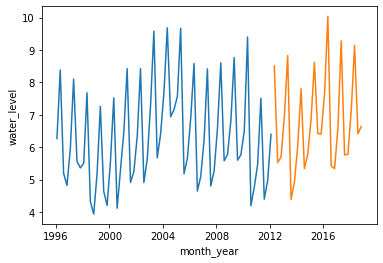

In [24]:
# iterating through each state and generating graphs at state level
for state, pol_date in time_dict.items():
    pol_date = datetime.strptime(pol_date, "%d-%m-%Y")
    state_data = gw_master[gw_master["state"] == state]
    state_data = (
        state_data.groupby(["month_year", "state"]).aggregate("mean").reset_index()
    )
    state_data["status"] = np.where(
        (state_data.month_year > pol_date),
        "After " + str(pol_date),
        "Before " + str(pol_date),
    )
    # chart = alt.Chart(state_data).mark_line().encode(
    #     x = "month_year",
    #     y = "water_level",
    #     color = 'status:N'
    # )
    # chart.save(str(state) + ".png")
    fig = sns.relplot(
        data=state_data, x="month_year", y="water_level", hue="status", kind="line", legend=False
    )
    fig.fig.suptitle(str(state))
    file_path = parent_folder + "state_profiles/" + str(state)
    Path(file_path).mkdir(exist_ok=True)
    fig.savefig(file_path + "/" + str(state) + "_1" + ".png")